# 1. Importing and Exploring the Dataset
Explanation:
We start by loading the dataset into a pandas DataFrame and exploring its structure, including dimensions, column names, and data type
s.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
file_path = "sales_data.csv"  # Adjust the file path if necessary
sales_data = pd.read_csv(file_path)
sales_data

,Order_ID,Product,Quantity,Price,Sale_Date
0,ORD-0001,Phone,17.0,NaN,2023-01-01
1,ORD-0002,Laptop,2.0,875.60,2023-01-02
2,ORD-0003,Keyboard,11.0,949.96,2023-01-03
3,ORD-0004,Monitor,9.0,341.90,2023-01-04
4,ORD-0005,Monitor,7.0,622.95,2023-01-05
...,...,...,...,...,...
495,ORD-0496,Keyboard,4.0,1299.45,2024-05-10
496,ORD-0497,Monitor,19.0,NaN,2024-05-11
497,ORD-0498,Phone,NaN,1220.25,2024-05-12
498,ORD-0499,Laptop,3.0,333.10,2024-05-13


In [3]:
# Check the dataset's shape and first few rows
print("Dataset Dimensions:", sales_data.shape)
print("Column Names:", sales_data.columns)

Dataset Dimensions: (500, 5)
Column Names: Index(['Order_ID', 'Product', 'Quantity', 'Price', 'Sale_Date'], dtype='object')


In [4]:
# Data types and missing values
print("\nData Types and Missing Values:")
print(sales_data.info())


Data Types and Missing Values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Order_ID   500 non-null    object 
 1   Product    500 non-null    object 
 2   Quantity   450 non-null    float64
 3   Price      450 non-null    float64
 4   Sale_Date  500 non-null    object 
dtypes: float64(2), object(3)
memory usage: 19.7+ KB
None


# 2. Handling Missing Values
Explanation:
Identify columns with missing values and visualize them with a heatmap to understand their distribution.

In [5]:
# Check for missing values
missing_values = sales_data.isnull().sum()
print("\nMissing Values:\n", missing_values)


Missing Values:
 Order_ID      0
Product       0
Quantity     50
Price        50
Sale_Date     0
dtype: int64


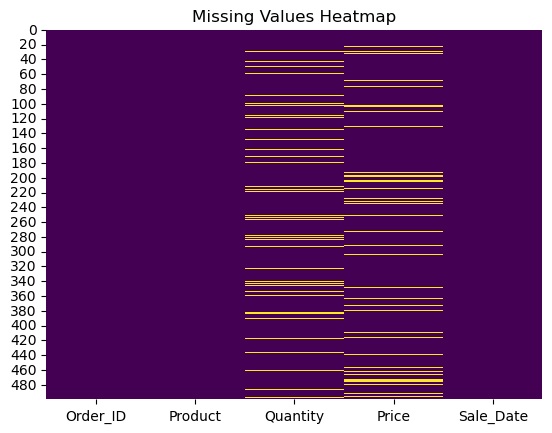

In [6]:
# Visualize missing values
sns.heatmap(sales_data.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

# 3. Creating a New Feature: Total Sale
Explanation:
Calculate total sales (Quantity * Price) as a new column to analyze overall revenue.

In [7]:
# Create a new column for total sales
sales_data["Total_Sale"] = sales_data["Quantity"] * sales_data["Price"]
print("\nFirst 5 Rows with Total Sale:")
print(sales_data.head())


First 5 Rows with Total Sale:
   Order_ID   Product  Quantity   Price   Sale_Date  Total_Sale
0  ORD-0001     Phone      17.0     NaN  2023-01-01         NaN
1  ORD-0002    Laptop       2.0  875.60  2023-01-02     1751.20
2  ORD-0003  Keyboard      11.0  949.96  2023-01-03    10449.56
3  ORD-0004   Monitor       9.0  341.90  2023-01-04     3077.10
4  ORD-0005   Monitor       7.0  622.95  2023-01-05     4360.65


In [8]:
# Check overall revenue statistics
total_revenue = sales_data["Total_Sale"].sum()
print("\nTotal Revenue:", total_revenue)


Total Revenue: 3076235.16


# 4. Analyzing Product Distribution
Explanation:
Examine the distribution of product types and visualize them using a bar chart.

In [9]:
# Count the number of sales for each product type
product_distribution = sales_data["Product"].value_counts()
print("\nProduct Distribution:\n", product_distribution)


Product Distribution:
 Product
Monitor     110
Keyboard    109
Phone       102
Laptop       94
Tablet       85
Name: count, dtype: int64


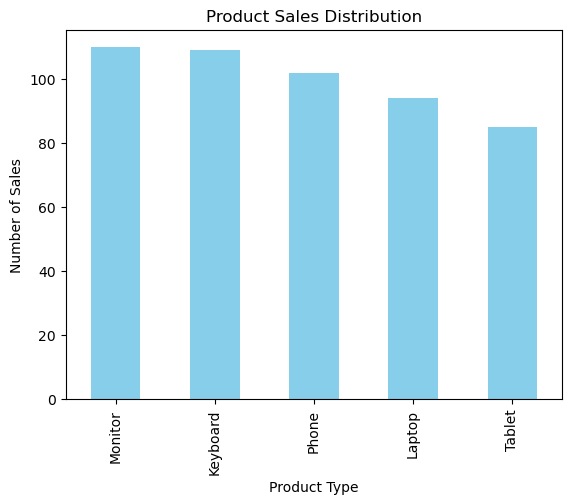

In [10]:

# Visualize product distribution
product_distribution.plot(kind="bar", color="skyblue")
plt.title("Product Sales Distribution")
plt.xlabel("Product Type")
plt.ylabel("Number of Sales")
plt.show()

# 5. Time Series Analysis: Daily Sales
Explanation:
Analyze how sales vary over time by aggregating daily revenue and plotting it.

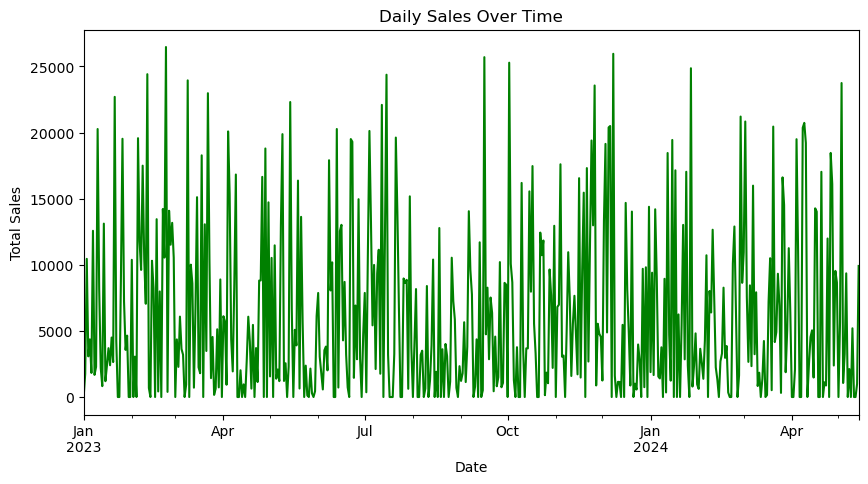

In [11]:
# Convert Sale_Date to datetime
sales_data["Sale_Date"] = pd.to_datetime(sales_data["Sale_Date"])

# Group data by date and calculate daily sales
daily_sales = sales_data.groupby("Sale_Date")["Total_Sale"].sum()

# Visualize daily sales
daily_sales.plot(kind="line", figsize=(10, 5), color="green")
plt.title("Daily Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.show()

# 6. Exploring Price and Quantity Relationship
Explanation:
Analyze the relationship between price and quantity using a scatter plot and calculate their correlation.

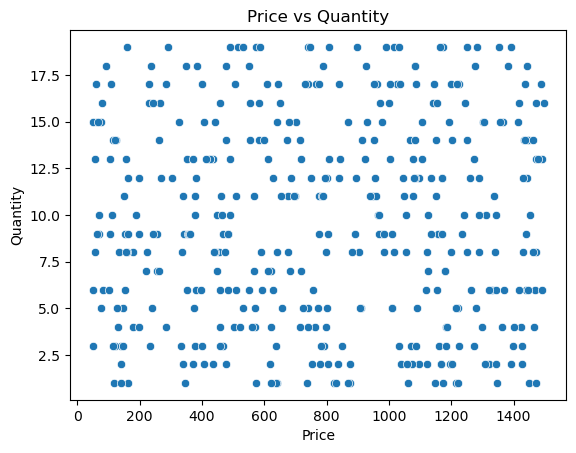


Correlation between Price and Quantity: 0.014495718222638026


In [12]:
# Scatter plot for Price vs Quantity
sns.scatterplot(x="Price", y="Quantity", data=sales_data)
plt.title("Price vs Quantity")
plt.xlabel("Price")
plt.ylabel("Quantity")
plt.show()

# Calculate correlation
correlation = sales_data["Price"].corr(sales_data["Quantity"])
print("\nCorrelation between Price and Quantity:", correlation)

# 7. Identifying Top and Bottom Selling Products
Explanation:
Find the top 5 and bottom 5 products based on total quantity sold and visualize them.


Top 5 Selling Products:
 Product
Keyboard    982.0
Phone       917.0
Laptop      868.0
Monitor     855.0
Tablet      728.0
Name: Quantity, dtype: float64

Bottom 5 Selling Products:
 Product
Keyboard    982.0
Phone       917.0
Laptop      868.0
Monitor     855.0
Tablet      728.0
Name: Quantity, dtype: float64


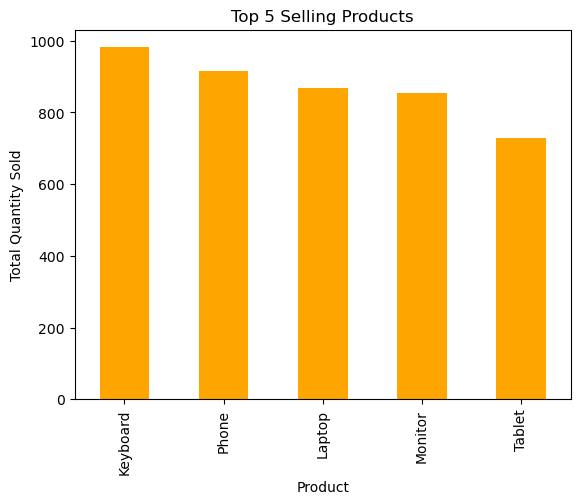

In [13]:
# Group by product and calculate total quantity sold
product_sales = sales_data.groupby("Product")["Quantity"].sum().sort_values(ascending=False)
print("\nTop 5 Selling Products:\n", product_sales.head(5))
print("\nBottom 5 Selling Products:\n", product_sales.tail(5))

# Visualize top 5 products
product_sales.head(5).plot(kind="bar", color="orange")
plt.title("Top 5 Selling Products")
plt.xlabel("Product")
plt.ylabel("Total Quantity Sold")
plt.show()

# 8. Analyzing Price Distribution and Outliers
Explanation:
Analyze the distribution of product prices and detect outliers using a histogram and boxplot.

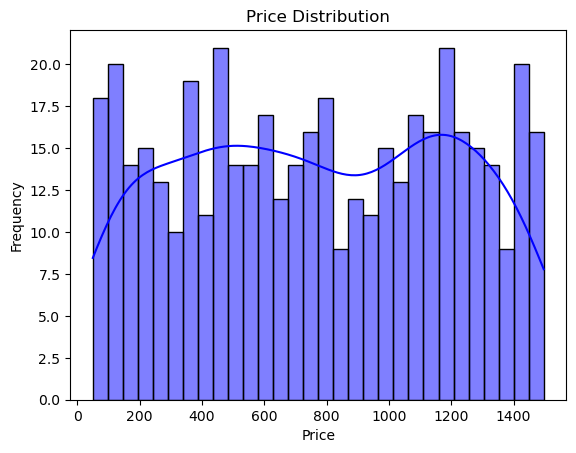

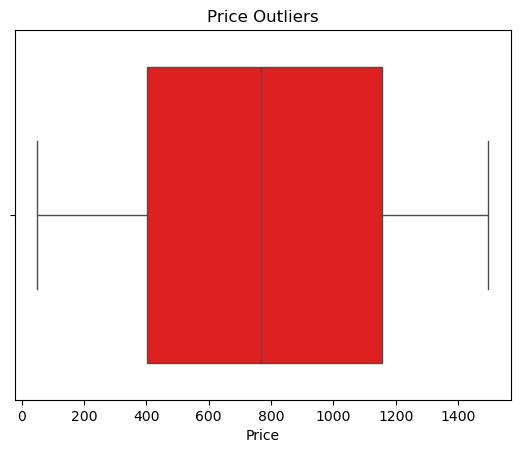

In [14]:
# Histogram for price distribution
sns.histplot(sales_data["Price"], kde=True, bins=30, color="blue")
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

# Boxplot for detecting outliers
sns.boxplot(x=sales_data["Price"], color="red")
plt.title("Price Outliers")
plt.show()


# 9. Revenue by Product Categories
Explanation:
Calculate total revenue for each product category and display it using a pie chart.


Revenue by Product:
 Product
Keyboard    805409.31
Phone       600414.66
Laptop      579161.39
Monitor     572677.91
Tablet      518571.89
Name: Total_Sale, dtype: float64


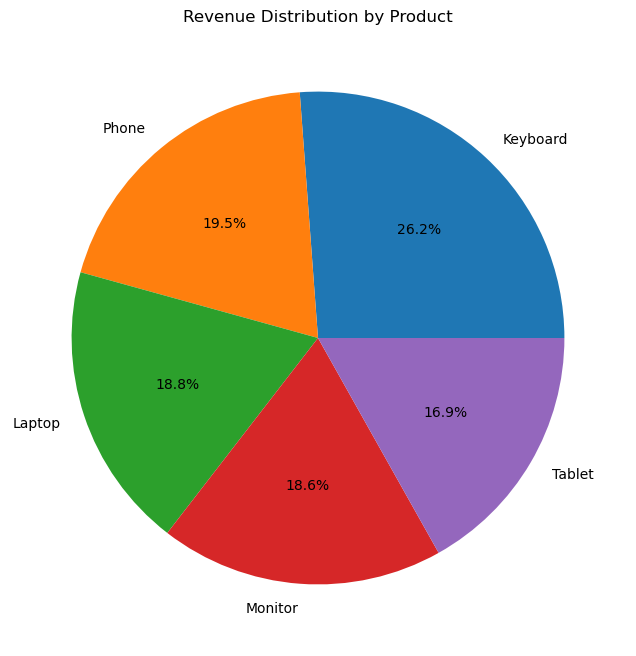

In [16]:
# Total revenue by product
revenue_by_product = sales_data.groupby("Product")["Total_Sale"].sum().sort_values(ascending=False)
print("\nRevenue by Product:\n", revenue_by_product)

# Pie chart for revenue distribution
revenue_by_product.plot(kind="pie", autopct='%1.1f%%', figsize=(8, 8))
plt.title("Revenue Distribution by Product")
plt.ylabel("")  # Remove y-label for clarity
plt.show()


# 10. Handling Missing Values and Recalculating Statistics
Explanation:
Fill missing values using appropriate methods and recalculate statistics to observe changes.

In [17]:
# Fill missing Quantity with the mean value
sales_data["Quantity"].fillna(sales_data["Quantity"].mean(), inplace=True)

# Fill missing Price with the median value
sales_data["Price"].fillna(sales_data["Price"].median(), inplace=True)

# Recalculate total sales
sales_data["Total_Sale"] = sales_data["Quantity"] * sales_data["Price"]

# Check updated statistics
print("\nUpdated Total Revenue:", sales_data["Total_Sale"].sum())



Updated Total Revenue: 3737329.75


C:\Users\90554\AppData\Local\Temp\ipykernel_16804\699435598.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sales_data["Quantity"].fillna(sales_data["Quantity"].mean(), inplace=True)
C:\Users\90554\AppData\Local\Temp\ipykernel_16804\699435598.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beh

# Final Step: Insights Summary and Visualization Dashboard

=== Key Insights ===
1. Total Revenue: $3737329.75
2. Average Quantity Sold per Transaction: 9.67
3. Most Sold Product: Keyboard
4. Highest Revenue Generating Product: Keyboard


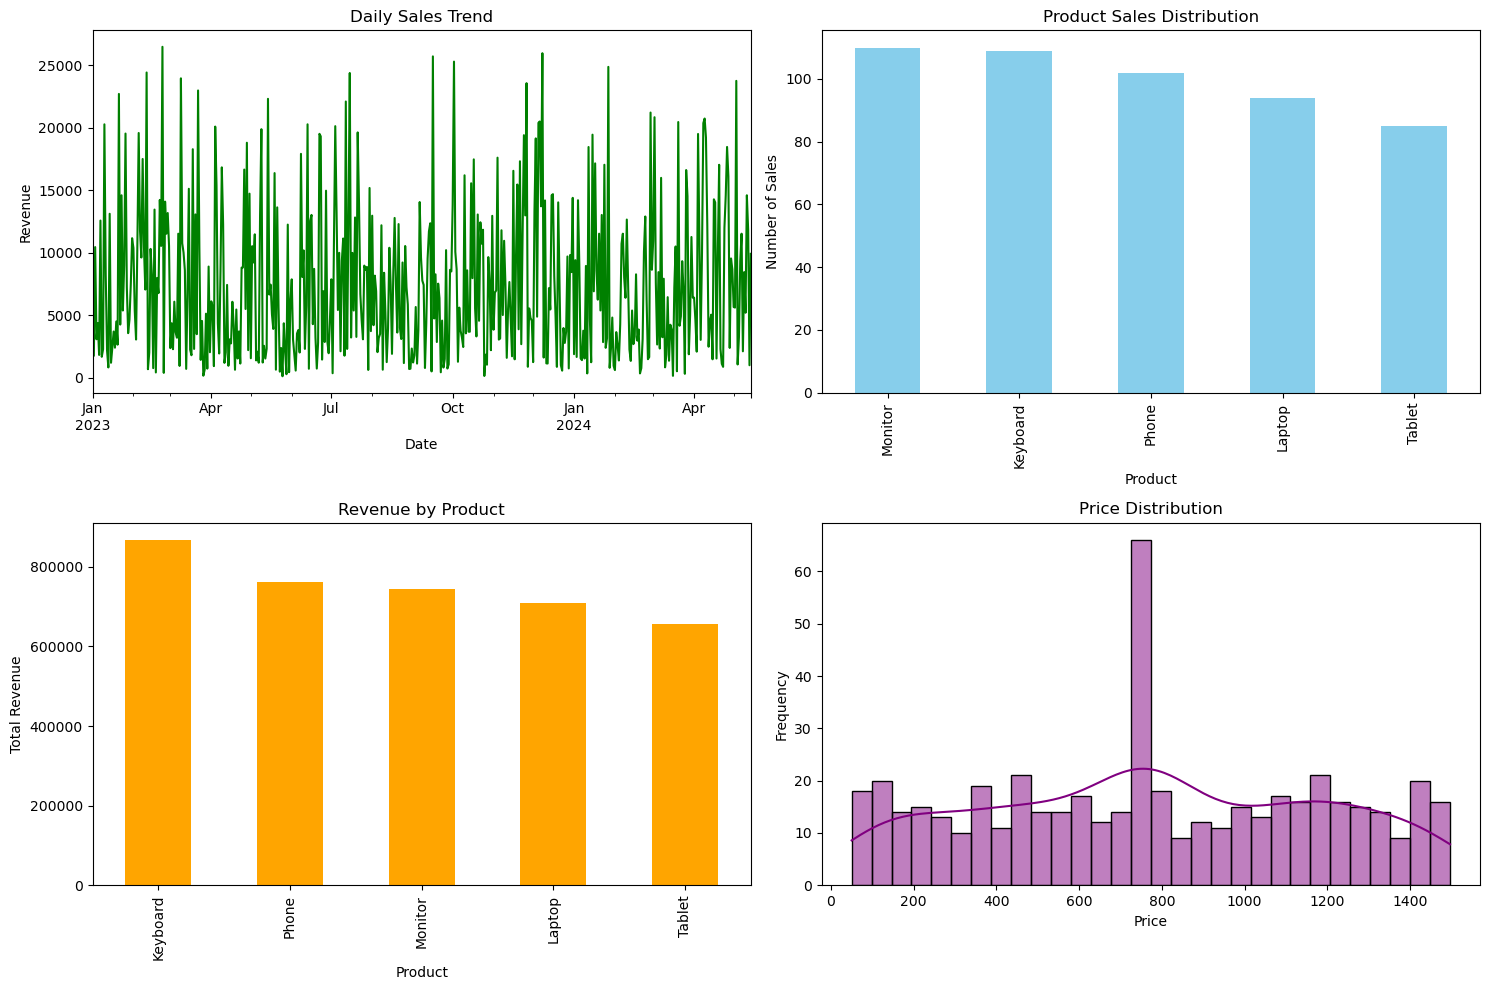

In [18]:
# Insights summary
total_revenue = sales_data["Total_Sale"].sum()
average_quantity = sales_data["Quantity"].mean()
most_sold_product = sales_data.groupby("Product")["Quantity"].sum().idxmax()
highest_revenue_product = sales_data.groupby("Product")["Total_Sale"].sum().idxmax()

print("=== Key Insights ===")
print(f"1. Total Revenue: ${total_revenue:.2f}")
print(f"2. Average Quantity Sold per Transaction: {average_quantity:.2f}")
print(f"3. Most Sold Product: {most_sold_product}")
print(f"4. Highest Revenue Generating Product: {highest_revenue_product}")

# Visualization dashboard
plt.figure(figsize=(15, 10))

# Subplot 1: Daily sales trend
plt.subplot(2, 2, 1)
daily_sales = sales_data.groupby("Sale_Date")["Total_Sale"].sum()
daily_sales.plot(kind="line", color="green")
plt.title("Daily Sales Trend")
plt.xlabel("Date")
plt.ylabel("Revenue")

# Subplot 2: Product distribution
plt.subplot(2, 2, 2)
product_distribution = sales_data["Product"].value_counts()
product_distribution.plot(kind="bar", color="skyblue")
plt.title("Product Sales Distribution")
plt.xlabel("Product")
plt.ylabel("Number of Sales")

# Subplot 3: Revenue by product
plt.subplot(2, 2, 3)
revenue_by_product = sales_data.groupby("Product")["Total_Sale"].sum().sort_values(ascending=False)
revenue_by_product.plot(kind="bar", color="orange")
plt.title("Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Total Revenue")

# Subplot 4: Price distribution
plt.subplot(2, 2, 4)
sns.histplot(sales_data["Price"], kde=True, bins=30, color="purple")
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()
